# Observations and insights

From the mice ....

In [116]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)
# Combine the data into a single dataset
combined_data=pd.merge(mouse_metadata,study_results, on="Mouse ID")

# Display the data table for preview
combined_data.head()
combined_data[["Mouse ID", "Timepoint"]].count()


Mouse ID     1893
Timepoint    1893
dtype: int64

In [53]:
# Checking the number of mice.
combined_data[["Mouse ID", "Timepoint"]].count()

# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicates = combined_data[combined_data.duplicated(['Mouse ID', 'Timepoint'])]
duplicates.head()

# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df =combined_data.drop([combined_data.index[909], combined_data.index[911], combined_data.index[913],  combined_data.index[915],  combined_data.index[917]])

# Checking the number of mice in the clean DataFrame.
clean_df[["Mouse ID", "Timepoint"]].count()
clean_df 

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


# Summary Statistics

In [34]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
group_regimen=clean_df.groupby(["Drug Regimen"])
mean=group_regimen["Tumor Volume (mm3)"].mean()
median=group_regimen["Tumor Volume (mm3)"].median()
variance=group_regimen["Tumor Volume (mm3)"].var()
std=group_regimen["Tumor Volume (mm3)"].std()
sem=group_regimen["Tumor Volume (mm3)"].sem()

# Assemble the resulting series into a single summary dataframe.

groupby_summary_df = pd.DataFrame({"Mean": mean,
                                    "Median": median,
                                  "Variance":variance,
                                   "Standard Deviation":std,
                                   "SEM":sem})
groupby_summary_df

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [35]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line

clean_df.groupby(["Drug Regimen"]).aggregate({"Tumor Volume (mm3)":[np.mean,np.median,np.var,np.std,st.sem]})


Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.393463  50.909965  43.138803  6.568014  0.525862
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

#  Bar and Pie Charts

In [36]:
# Calculate total number of measurements taken on each drug regimen using pandas.
total_measurement=group_regimen["Mouse ID"].count()
total_measurement


Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     156
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Mouse ID, dtype: int64

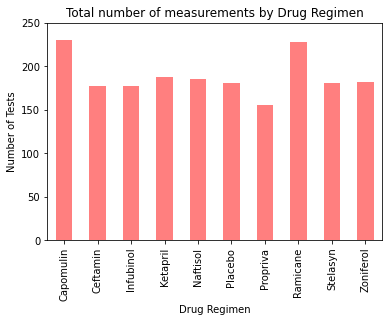

<Figure size 432x288 with 0 Axes>

In [37]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.

# Create a DataFrame from total_measurement series
total_measurement_df=pd.DataFrame(total_measurement)

#Rename counts by Mouse ID to Number of Tests
total_measurement_df.rename(columns={"Mouse ID":"Number of Tests"}, inplace=True)
total_measurement_df.plot(kind="bar", figsize=(6,4), ylim=(0,250),color='r', alpha=0.5, legend=False, ylabel="Number of Tests")

# Set a title for the chart
plt.title("Total number of measurements by Drug Regimen")
plt.show()
plt.tight_layout()

#Note: I couldn't manage to put the same x width as the pyplot method

(0.0, 280.0)

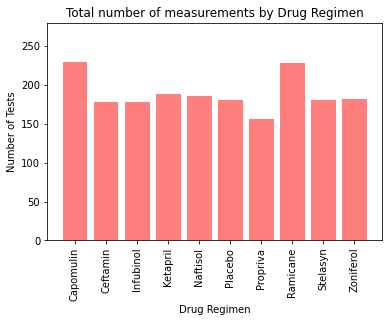

In [38]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
x_axis = np.arange(len(total_measurement))

# We apply align="edge" to ensure our bars line up with our tick marks
plt.bar(x_axis, total_measurement, color='r', alpha=0.5, align="center")

#Tell matplotlib where we would like to place each of our x axis headers
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ["Capomulin", "Ceftamin", "Infubinol", "Ketapril", "Naftisol",
                            "Placebo","Propriva", "Ramicane","Stelasyn","Zoniferol"],rotation=90)

 # Give our chart some labels and a tile
plt.title("Total number of measurements by Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Tests")

# Sets the y limits of the current chart
plt.ylim(0, max(total_measurement)+50)

In [39]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
sex_group=clean_df.groupby(["Sex"])
sex_distribution=sex_group["Mouse ID"].count()
sex_distribution



Sex
Female    930
Male      958
Name: Mouse ID, dtype: int64

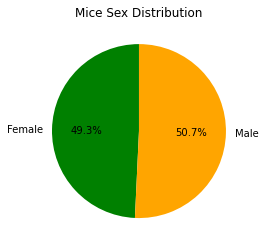

In [46]:
# Create a DataFrame from sex distribution series
sex_distribution_df=pd.DataFrame(sex_distribution)

#Rename counts by Mouse ID to Sex
sex_distribution_df.rename(columns={"Mouse ID":"Sex"}, inplace=True)
colors = ["green", "orange"]

#Pie chart
sex_distribution_df["Sex"].plot(kind="pie",figsize=(8,4),startangle=90,autopct='%1.1f%%',legend=False, colors=colors,ylabel="")

# Set a title for the chart
plt.title("Mice Sex Distribution")
plt.show()

Text(0.5, 1.0, 'Mice Sex Distribution')

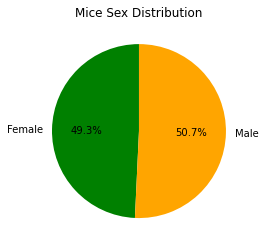

In [47]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

# Labels for the sections of our pie chart
labels = ["Female","Male"]

# The values of each section of the pie chart
sizes = [930,958]

# The colors of each section of the pie chart
colors = ["green", "orange"]

plt.pie(sizes, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=False, startangle=90)

plt.title("Mice Sex Distribution")

# Quartiles, Outliers and Boxplots

In [151]:
 # Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Put treatments into a list for for loop (and later for plot labels)
drug_regimen=["Capomulin","Ramicane","Infubinol","Ceftamin"]
tumor_volume_data=[]



for drug in drug_regimen:
    tumor_volume_data=([clean_df["Drug Regimen","Tumor Volume (mm3)"]])

tumor_volume_data    

#for regimen in drug_regimen:
        #selected_regimens.append(clean_df.loc["Drug Regimen"==regimen,"Tumor Volume (mm3)"])
                                                    
#selected_regimens.head()
 
    


#Calculate the quartiles and IQR and quantitatively determine if there are any potential outliers across all four treatment regimens.


#Using Matplotlib, generate a box and whisker plot of the final tumor volume for all four treatment regimens and highlight any potential outliers in the plot by changing their color and style.
#Hint: All four box plots should be within the same figure. Use this Matplotlib documentation page for help with changing the style of the outliers.


#fig1, ax1 = plt.subplots()
#ax1.set_title('Temperatures at LAX')
#ax1.set_ylabel('Temperature (°F)')
#ax1.boxplot(temperatures)
#plt.show()   



KeyError: ('Drug Regimen', 'Tumor Volume (mm3)')

In [ ]:






# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds

In [ ]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


# Line and Scatter Plots

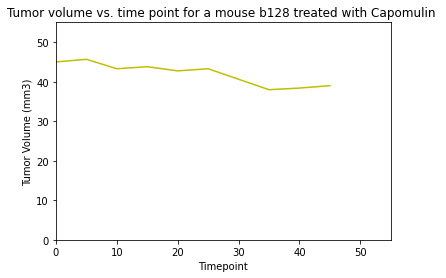

In [113]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
mouse_df=clean_df.loc[clean_df["Mouse ID"]=="b128",["Tumor Volume (mm3)","Timepoint"]]

x=mouse_df["Timepoint"]
y=mouse_df["Tumor Volume (mm3)"]

# Give our chart some labels and a tile
plt.title("Tumor volume vs. time point for a mouse b128 treated with Capomulin ")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")


# Sets the y limits of the current chart
plt.xlim(0, 55)
plt.ylim(0, 55)

plt.plot(x, y,"y")
plt.show()  

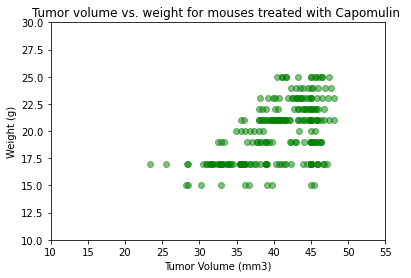

In [124]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capomulin_df=clean_df.loc[clean_df["Drug Regimen"]=="Capomulin",["Tumor Volume (mm3)","Weight (g)"]]

x=capomulin_df["Tumor Volume (mm3)"]
y=capomulin_df["Weight (g)"]
color= ["green"]

 # Give our chart some labels and a tile
plt.title("Tumor volume vs. weight for mouses treated with Capomulin ")
plt.xlabel("Tumor Volume (mm3)")
plt.ylabel("Weight (g)")

# Sets the y limits of the current chart
plt.xlim(10, 55)
plt.ylim(10, 30)

plt.scatter(x, y, c=color, alpha=0.5)
plt.show()                   
               

# Correlation and Regression

In [114]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

Tumor_Volume=capomulin_df["Tumor Volume (mm3)"]
Weight_g=capomulin_df["Weight (g)"]

correlation = st.pearsonr(Tumor_Volume,Weight_g)
print(f"The correlation between both factors is {round(correlation[0],2)}")



The correlation between both factors is 0.53


The r-squared is: 0.2763600223455911


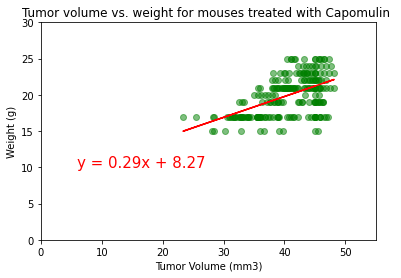

In [128]:
#Plot the linear regression model on top of the previous scatter plot.
x=capomulin_df["Tumor Volume (mm3)"]
y=capomulin_df["Weight (g)"]

plt.scatter(x,y,c=color, alpha=0.5)

#linear regression model
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
plt.plot(x,regress_values,"r-")

#line of regression
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

# Sets the y limits of the current chart
plt.xlim(0, 55)
plt.ylim(0, 30)

#Titles
plt.title("Tumor volume vs. weight for mouses treated with Capomulin ")
plt.xlabel("Tumor Volume (mm3)")
plt.ylabel("Weight (g)")

print(f"The r-squared is: {rvalue**2}")
plt.show()